# This Sentiment analysis model had the worse performance

## Future considerations

### 1. Proper Text mining needs to be done as the base dataset contained lots of uncorrelated news
### 2. The only way for this model to perform better is first to do heavy statistical analysis on news, checking the correlations, making a very clean and accurate corpus and then making a hybrid model

In [1]:
import pickle
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
pickle_in = open('sentiment.pickle' , 'rb')
sentiment = pickle.load(pickle_in)

In [3]:
pickle_in = open('input_news.pickle' , 'rb')
x_in = pickle.load(pickle_in)

In [4]:
token_news = pd.read_csv('final_dataset_007.csv')
t = Tokenizer()
t.fit_on_texts(token_news['headline_clean'])

In [5]:
news_seq = t.texts_to_sequences(token_news['headline_clean'])
news_seq = pad_sequences(news_seq , maxlen= 100 , padding= 'post' , truncating= 'post')

In [6]:
max_lenn = t.word_index
len(max_lenn)

18294

In [8]:
x_in = x_in.reshape(2624,100,1)

In [9]:
from tensorflow.keras.layers import LSTM, Dense , Input , Dropout , Concatenate , Embedding
from tensorflow.keras.models import Model

In [11]:
inn_n = Input(shape = (100,1))
embb = Embedding(18294 , 50)(inn_n)
lstm_n = LSTM(50 , return_sequences = False)(inn_n)
dense_1_n  = Dense(40 , activation = 'relu' , kernel_regularizer = 'l1' )(lstm_n)
dropout_2_n = Dropout(0.1)(dense_1_n)
dense_2_n = Dense(20 , activation = 'relu')(dropout_2_n)
dense_f = Dense(30 , activation = 'relu' , kernel_regularizer = 'l1' )(dense_2_n)
op_dense = Dense(1)(dense_f)

model = Model(inputs = [inn_n ] , outputs = [op_dense])

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100, 1)]          0         
_________________________________________________________________
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dense (Dense)                (None, 40)                2040      
_________________________________________________________________
dropout (Dropout)            (None, 40)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                820       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                630       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31    

In [13]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0025) , loss = 'binary_crossentropy')

In [14]:
#news data
x_train_n = news_seq[:1900]
x_test_n =  news_seq[1900:]
y_train = np.array(sentiment[:1900])
y_test = np.array(sentiment[1900:])

In [17]:
history = model.fit(x_train_n , y_train , epochs = 30 , batch_size = 32 , validation_data = [ x_test_n , y_test] , verbose = 2)

Epoch 1/30
60/60 - 7s - loss: 0.7445 - val_loss: 0.0438
Epoch 2/30
60/60 - 8s - loss: 0.7342 - val_loss: 0.0398
Epoch 3/30
60/60 - 7s - loss: 0.7307 - val_loss: 0.0287
Epoch 4/30
60/60 - 8s - loss: 0.7234 - val_loss: 0.0254
Epoch 5/30
60/60 - 7s - loss: 0.7200 - val_loss: 0.0232
Epoch 6/30
60/60 - 7s - loss: 0.7151 - val_loss: 0.0233
Epoch 7/30
60/60 - 5s - loss: 0.7148 - val_loss: 0.0168
Epoch 8/30
60/60 - 6s - loss: 0.7108 - val_loss: 0.0148
Epoch 9/30
60/60 - 7s - loss: 0.7070 - val_loss: 0.0128
Epoch 10/30
60/60 - 5s - loss: 0.7054 - val_loss: 0.0115
Epoch 11/30
60/60 - 4s - loss: 0.7059 - val_loss: 0.0119
Epoch 12/30
60/60 - 4s - loss: 0.7036 - val_loss: 0.0105
Epoch 13/30
60/60 - 4s - loss: 0.7038 - val_loss: 0.0089
Epoch 14/30
60/60 - 4s - loss: 0.7019 - val_loss: 0.0087
Epoch 15/30
60/60 - 4s - loss: 0.7014 - val_loss: 0.0078
Epoch 16/30
60/60 - 4s - loss: 0.7011 - val_loss: 0.0085
Epoch 17/30
60/60 - 4s - loss: 0.7010 - val_loss: 0.0073
Epoch 18/30
60/60 - 4s - loss: 0.7001 - 

In [18]:
import matplotlib.pyplot as plt

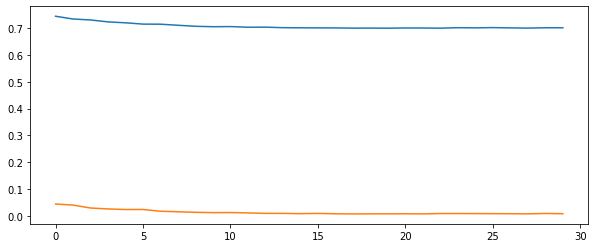

In [19]:
plt.figure(figsize = (10,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [20]:
test_predictions = model.predict(x_test_n)

In [21]:
pred = []
for i in test_predictions:
    if i <= 0.5:
        pred.append(0)
    else:
        pred.append(1)
acc = 0
for i in range(0,len(pred)):
    if pred[i] == y_test[i]:
        acc += 1
    else:
        pass

In [22]:
from sklearn.metrics import accuracy_score

In [24]:
acc = accuracy_score(np.rint(test_predictions) , y_test)

In [26]:
acc*100

52.20994475138122

### This task enticed me alot, in future I wish to fill in the gaps and aim to make a better model 